In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import time
import os

In [2]:
train = pd.read_csv('./HousePrice_train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude = ['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)

Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 38)


In [4]:
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [5]:
train.drop('Id', axis = 1, inplace = True)
train.fillna(0, inplace = True)

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [6]:
print("")
print('List of features contained our dataset:', list(train.columns))
print("")
print('Shape of the test data with numerical features:', train.shape)


List of features contained our dataset: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Shape of the test data with numerical features: (1460, 37)


In [7]:
# Preprocessing Outliers
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano

,Top
0,1
1,1
2,1
3,1
4,1
...,...
1455,1
1456,1
1457,-1
1458,1


In [8]:
train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 139
Number of rows without outliers: 1321


In [9]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# Normalization
train = np.asarray(train)
train.shape

(1321, 37)

In [11]:
x_norm = train.copy()
x_norm.shape

(1321, 37)

In [12]:
x_min = np.min(train, axis = 0)
x_min

array([2.0000e+01, 0.0000e+00, 1.3000e+03, 2.0000e+00, 2.0000e+00,
       1.8800e+03, 1.9500e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 4.3800e+02, 0.0000e+00, 0.0000e+00,
       4.3800e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       2.0060e+03, 3.5311e+04])

In [13]:
x_norm = np.subtract(x_norm, x_min)

In [14]:
x_norm

array([[4.00000e+01, 6.50000e+01, 7.15000e+03, ..., 1.00000e+00,
        2.00000e+00, 1.73189e+05],
       [0.00000e+00, 8.00000e+01, 8.30000e+03, ..., 4.00000e+00,
        1.00000e+00, 1.46189e+05],
       [4.00000e+01, 6.80000e+01, 9.95000e+03, ..., 8.00000e+00,
        2.00000e+00, 1.88189e+05],
       ...,
       [0.00000e+00, 8.50000e+01, 1.18750e+04, ..., 1.00000e+00,
        4.00000e+00, 1.74689e+05],
       [0.00000e+00, 6.80000e+01, 8.41700e+03, ..., 3.00000e+00,
        4.00000e+00, 1.06814e+05],
       [0.00000e+00, 7.50000e+01, 8.63700e+03, ..., 5.00000e+00,
        2.00000e+00, 1.12189e+05]])

In [15]:
train

array([[6.00000e+01, 6.50000e+01, 8.45000e+03, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+01, 8.00000e+01, 9.60000e+03, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [6.00000e+01, 6.80000e+01, 1.12500e+04, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [2.00000e+01, 8.50000e+01, 1.31750e+04, ..., 2.00000e+00,
        2.01000e+03, 2.10000e+05],
       [2.00000e+01, 6.80000e+01, 9.71700e+03, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [2.00000e+01, 7.50000e+01, 9.93700e+03, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

In [16]:
x_max = np.max(train, axis = 0)
x_norm /= x_max
x_max

array([1.90000e+02, 3.13000e+02, 1.15149e+05, 1.00000e+01, 9.00000e+00,
       2.00900e+03, 2.01000e+03, 1.60000e+03, 1.69600e+03, 1.47400e+03,
       2.12100e+03, 3.20600e+03, 2.52400e+03, 1.61100e+03, 5.28000e+02,
       3.19400e+03, 3.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00,
       6.00000e+00, 2.00000e+00, 1.20000e+01, 3.00000e+00, 2.01000e+03,
       4.00000e+00, 1.39000e+03, 7.36000e+02, 3.64000e+02, 3.30000e+02,
       5.08000e+02, 3.85000e+02, 7.38000e+02, 1.55000e+04, 1.20000e+01,
       2.01000e+03, 4.65000e+05])

In [17]:
x_norm

array([[2.10526316e-01, 2.07667732e-01, 6.20934615e-02, ...,
        8.33333333e-02, 9.95024876e-04, 3.72449462e-01],
       [0.00000000e+00, 2.55591054e-01, 7.20805218e-02, ...,
        3.33333333e-01, 4.97512438e-04, 3.14384946e-01],
       [2.10526316e-01, 2.17252396e-01, 8.64097821e-02, ...,
        6.66666667e-01, 9.95024876e-04, 4.04707527e-01],
       ...,
       [0.00000000e+00, 2.71565495e-01, 1.03127253e-01, ...,
        8.33333333e-02, 1.99004975e-03, 3.75675269e-01],
       [0.00000000e+00, 2.17252396e-01, 7.30965966e-02, ...,
        2.50000000e-01, 1.99004975e-03, 2.29707527e-01],
       [0.00000000e+00, 2.39616613e-01, 7.50071646e-02, ...,
        4.16666667e-01, 9.95024876e-04, 2.41266667e-01]])

In [18]:
np.max(x_norm)

1.0

In [19]:
x_norm.shape

(1321, 37)

In [20]:
train_x_wo = train[:, :36]
train_y_wo = train[:, 36].reshape(-1,1)

train_x_norm = x_norm[:, :36]
train_y_norm = x_norm[:, 36].reshape(-1,1)

print('train_x_without normalization:', train_x_wo.shape)
print('train_y_without normalization:', train_y_wo.shape)
print('train_x_normalization:', train_x_norm.shape)
print('train_y_normalization:', train_y_norm.shape)

train_x_without normalization: (1321, 36)
train_y_without normalization: (1321, 1)
train_x_normalization: (1321, 36)
train_y_normalization: (1321, 1)


In [21]:
# ANN model
n_input = 36
n_hidden1 = 200
n_hidden2 = 100
n_hidden3 = 50
n_hidden4 = 25
n_output = 1

In [22]:
tf.reset_default_graph() #리셋

weights = {
    'hidden1' : tf.Variable(tf.random_normal([n_input, n_hidden1], stddev = 0.1)),
    'hidden2' : tf.Variable(tf.random_normal([n_hidden1, n_hidden2], stddev = 0.1)),
    'hidden3' : tf.Variable(tf.random_normal([n_hidden2, n_hidden3], stddev = 0.1)),
    'hidden4' : tf.Variable(tf.random_normal([n_hidden3, n_hidden4], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden4, n_output], stddev = 0.1))
}

biases = {
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1)),
    'hidden2' : tf.Variable(tf.random_normal([n_hidden2], stddev = 0.1)),
    'hidden3' : tf.Variable(tf.random_normal([n_hidden3], stddev = 0.1)),
    'hidden4' : tf.Variable(tf.random_normal([n_hidden4], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1))
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])
lr = tf.placeholder(tf.float32)

In [23]:
def base_model(x, weights, biases):
    
    hidden1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
    hidden1 = tf.nn.relu(hidden1)
    
    hidden2 = tf.add(tf.matmul(hidden1, weights['hidden2']), biases['hidden2'])
    hidden2 = tf.nn.relu(hidden2)
 
    hidden3 = tf.add(tf.matmul(hidden2, weights['hidden3']), biases['hidden3'])
    hidden3 = tf.nn.relu(hidden3)
    
    hidden4 = tf.add(tf.matmul(hidden3, weights['hidden4']), biases['hidden4'])
    hidden4 = tf.nn.relu(hidden4)
    
    output = tf.add(tf.matmul(hidden4, weights['output']), biases['output'])
    
    return output

pred = base_model(x, weights, biases)
loss = tf.reduce_mean(tf.square(pred - y))
optm = tf.train.AdamOptimizer(lr).minimize(loss)

In [24]:
# Not normalized VS Normalized
# train_valid_split
def train_test_split(x, y, test_rate = 0.2):
    v_idx = np.random.choice(len(x), size = int(len(x)*test_rate), replace = False)
    t_idx = np.setdiff1d(np.arange(len(x)), v_idx)
    return x[t_idx], y[t_idx], x[v_idx], y[v_idx]

# for minibatch gradient descent
def minibatch(x, y, batch_size = None):
    idx = np.random.choice(len(x), batch_size, replace=False)
    return x[idx], y[idx]

In [25]:
train_X, train_Y, test_X, test_Y = train_test_split(train_x_wo, train_y_wo)

In [26]:
train_X_n, train_Y_n, test_X_n, test_Y_n = train_test_split(train_x_norm, train_y_norm)

In [27]:
n_iter = 10000
n_prt = 500
n_batch = 50
LR = 0.001

In [28]:
%%time

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_record_train = []

for epoch in range(n_iter):
    train_x, train_y = minibatch(train_X, train_Y, n_batch)
    sess.run(optm, feed_dict = {x: train_x, y: train_y, lr:LR})

    if epoch % n_prt == 0:
        cost = sess.run(loss, feed_dict = {x: train_x, y: train_y})
        loss_record_train.append(cost)
        
        print("Iter {:03d} || train_loss: {:.5f}".format(epoch, cost))
# ANN은 Tensorflow GPU가 CPU 보다 느리다.
# CNN, RNN은 Tensorflow GPU가 더 빠르다.

Iter 000 || train_loss: 28195891200.00000
Iter 500 || train_loss: 893066752.00000
Iter 1000 || train_loss: 574927936.00000
Iter 1500 || train_loss: 808930688.00000
Iter 2000 || train_loss: 774627136.00000
Iter 2500 || train_loss: 1230033664.00000
Iter 3000 || train_loss: 793521984.00000
Iter 3500 || train_loss: 848564224.00000
Iter 4000 || train_loss: 910808832.00000
Iter 4500 || train_loss: 741632832.00000
Iter 5000 || train_loss: 756556992.00000
Iter 5500 || train_loss: 566056320.00000
Iter 6000 || train_loss: 991218432.00000
Iter 6500 || train_loss: 448458496.00000
Iter 7000 || train_loss: 857593856.00000
Iter 7500 || train_loss: 879412864.00000
Iter 8000 || train_loss: 433173632.00000
Iter 8500 || train_loss: 760351616.00000
Iter 9000 || train_loss: 503478592.00000
Iter 9500 || train_loss: 455273728.00000
CPU times: user 1min 4s, sys: 11.1 s, total: 1min 15s
Wall time: 30.6 s


In [29]:
%%time

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_record_train_n = []

for epoch in range(n_iter):
    train_x, train_y = minibatch(train_X_n, train_Y_n, n_batch)
    sess.run(optm, feed_dict = {x: train_x, y: train_y, lr:LR})

    
    if epoch % n_prt == 0:
        cost = sess.run(loss, feed_dict = {x: train_x, y: train_y})
        loss_record_train_n.append(cost)
        
        print("Iter {:03d} || train_loss: {:.5f}".format(epoch, cost))

Iter 000 || train_loss: 0.19343
Iter 500 || train_loss: 0.00157
Iter 1000 || train_loss: 0.00071
Iter 1500 || train_loss: 0.00044
Iter 2000 || train_loss: 0.00029
Iter 2500 || train_loss: 0.00028
Iter 3000 || train_loss: 0.00034
Iter 3500 || train_loss: 0.00019
Iter 4000 || train_loss: 0.00004
Iter 4500 || train_loss: 0.00007
Iter 5000 || train_loss: 0.00011
Iter 5500 || train_loss: 0.00007
Iter 6000 || train_loss: 0.00007
Iter 6500 || train_loss: 0.00009
Iter 7000 || train_loss: 0.00004
Iter 7500 || train_loss: 0.00003
Iter 8000 || train_loss: 0.00005
Iter 8500 || train_loss: 0.00002
Iter 9000 || train_loss: 0.00004
Iter 9500 || train_loss: 0.00003
CPU times: user 1min 3s, sys: 10.7 s, total: 1min 14s
Wall time: 29.8 s


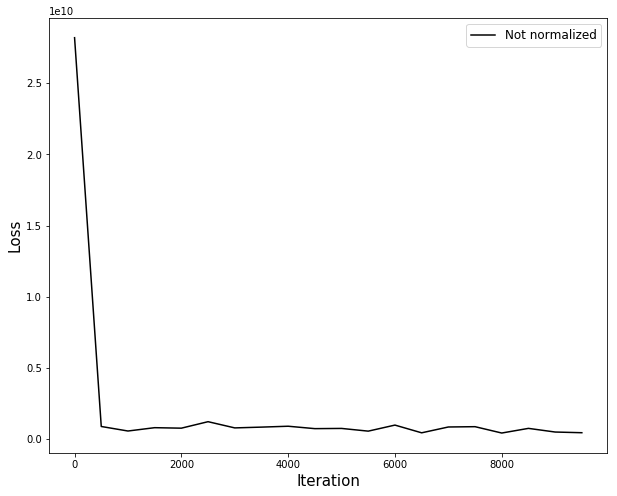

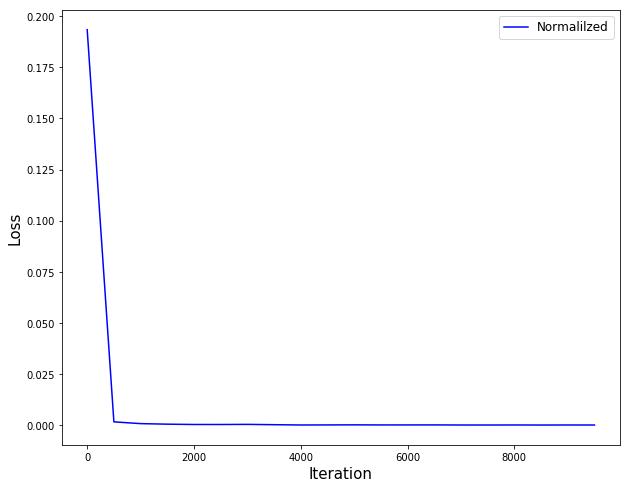

In [30]:
not_n_alpha = 1
n_alpha = 1

plt.figure(figsize=(10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'k-', alpha = not_n_alpha, label = 'Not normalized')
# plt.plot(np.arange(len(loss_record_train_n))*n_prt, loss_record_train_n, 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
# plt.ylim([0, 5])
plt.legend(fontsize = 12)
plt.show()

plt.figure(figsize=(10,8))
# plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'k-', alpha = not_n_alpha, label = 'Not normalized')
plt.plot(np.arange(len(loss_record_train_n))*n_prt, loss_record_train_n, 'b-', alpha = n_alpha,  label = 'Normalilzed')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
# plt.ylim([0, 5])
plt.legend(fontsize = 12)
plt.show()

In [31]:
test_x = test_X_n
test_y = test_Y_n
test_y

array([[0.21008387],
       [0.19287957],
       [0.12406237],
       [0.18212688],
       [0.20363226],
       [0.19933118],
       [0.51653548],
       [0.21438495],
       [0.38965376],
       [0.24965376],
       [0.28105161],
       [0.58212688],
       [0.36696559],
       [0.04234194],
       [0.14965376],
       [0.26599785],
       [0.17997634],
       [0.31330968],
       [0.39287957],
       [0.31115914],
       [0.21008387],
       [0.28857849],
       [0.20470753],
       [0.46169677],
       [0.14685806],
       [0.22836344],
       [0.2434172 ],
       [0.22943871],
       [0.16492258],
       [0.31223441],
       [0.39718065],
       [0.37330968],
       [0.54146022],
       [0.57670108],
       [0.34771828],
       [0.25954624],
       [0.28427742],
       [0.25954624],
       [0.41868602],
       [0.67675054],
       [0.18750323],
       [0.24599785],
       [0.27438495],
       [0.05821935],
       [0.45933118],
       [0.39718065],
       [0.23976129],
       [0.213

In [32]:
my_pred = sess.run(pred, feed_dict = {x: test_x})
my_pred

array([[ 0.20338178],
       [ 0.21152589],
       [ 0.08295427],
       [ 0.15791309],
       [ 0.16872701],
       [ 0.18026853],
       [ 0.5239473 ],
       [ 0.1958319 ],
       [ 0.36835384],
       [ 0.37684724],
       [ 0.3194587 ],
       [ 0.628869  ],
       [ 0.3348001 ],
       [ 0.07408348],
       [ 0.17218351],
       [ 0.27418664],
       [ 0.15376016],
       [ 0.3726059 ],
       [ 0.34666413],
       [ 0.31228584],
       [ 0.19554931],
       [ 0.28895077],
       [ 0.22516772],
       [ 0.49044463],
       [ 0.25058317],
       [ 0.22790858],
       [ 0.24852467],
       [ 0.23841733],
       [ 0.12451576],
       [ 0.32601023],
       [ 0.43060708],
       [ 0.33411956],
       [ 0.42890444],
       [ 0.40391636],
       [ 0.40793034],
       [ 0.25395694],
       [ 0.26138207],
       [ 0.20564115],
       [ 0.38692024],
       [ 0.59513843],
       [ 0.15403756],
       [ 0.26268023],
       [ 0.27577108],
       [ 0.21894473],
       [ 0.4624215 ],
       [ 0

In [33]:
test_y_min = x_min[36]
test_y_max = x_max[36]

test_y = (test_y * test_y_max) + test_y_min
my_pred = (my_pred * test_y_max) + test_y_min

In [34]:
test_y

array([[133000.],
       [125000.],
       [ 93000.],
       [120000.],
       [130000.],
       [128000.],
       [275500.],
       [135000.],
       [216500.],
       [151400.],
       [166000.],
       [306000.],
       [205950.],
       [ 55000.],
       [104900.],
       [159000.],
       [119000.],
       [181000.],
       [218000.],
       [180000.],
       [133000.],
       [169500.],
       [130500.],
       [250000.],
       [103600.],
       [141500.],
       [148500.],
       [142000.],
       [112000.],
       [180500.],
       [220000.],
       [208900.],
       [287090.],
       [303477.],
       [197000.],
       [156000.],
       [167500.],
       [156000.],
       [230000.],
       [350000.],
       [122500.],
       [149700.],
       [162900.],
       [ 62383.],
       [248900.],
       [220000.],
       [146800.],
       [134800.],
       [187500.],
       [328900.],
       [173000.],
       [117000.],
       [178000.],
       [274970.],
       [119000.],
       [23

In [35]:
my_pred

array([[129883.52 ],
       [133670.53 ],
       [ 73884.734],
       [108740.586],
       [113769.06 ],
       [119135.87 ],
       [278946.5  ],
       [126372.83 ],
       [206595.53 ],
       [210544.97 ],
       [183859.3  ],
       [327735.1  ],
       [190993.05 ],
       [ 69759.81 ],
       [115376.336],
       [162807.78 ],
       [106809.48 ],
       [208572.73 ],
       [196509.83 ],
       [180523.92 ],
       [126241.43 ],
       [169673.11 ],
       [140014.   ],
       [263367.75 ],
       [151832.17 ],
       [141288.5  ],
       [150874.97 ],
       [146175.06 ],
       [ 93210.83 ],
       [186905.75 ],
       [235543.3  ],
       [190676.6  ],
       [234751.56 ],
       [223132.11 ],
       [224998.61 ],
       [153400.97 ],
       [156853.66 ],
       [130934.13 ],
       [215228.9  ],
       [312050.38 ],
       [106938.47 ],
       [157457.31 ],
       [163544.56 ],
       [137120.3  ],
       [250337.   ],
       [191377.95 ],
       [138775.12 ],
       [14283

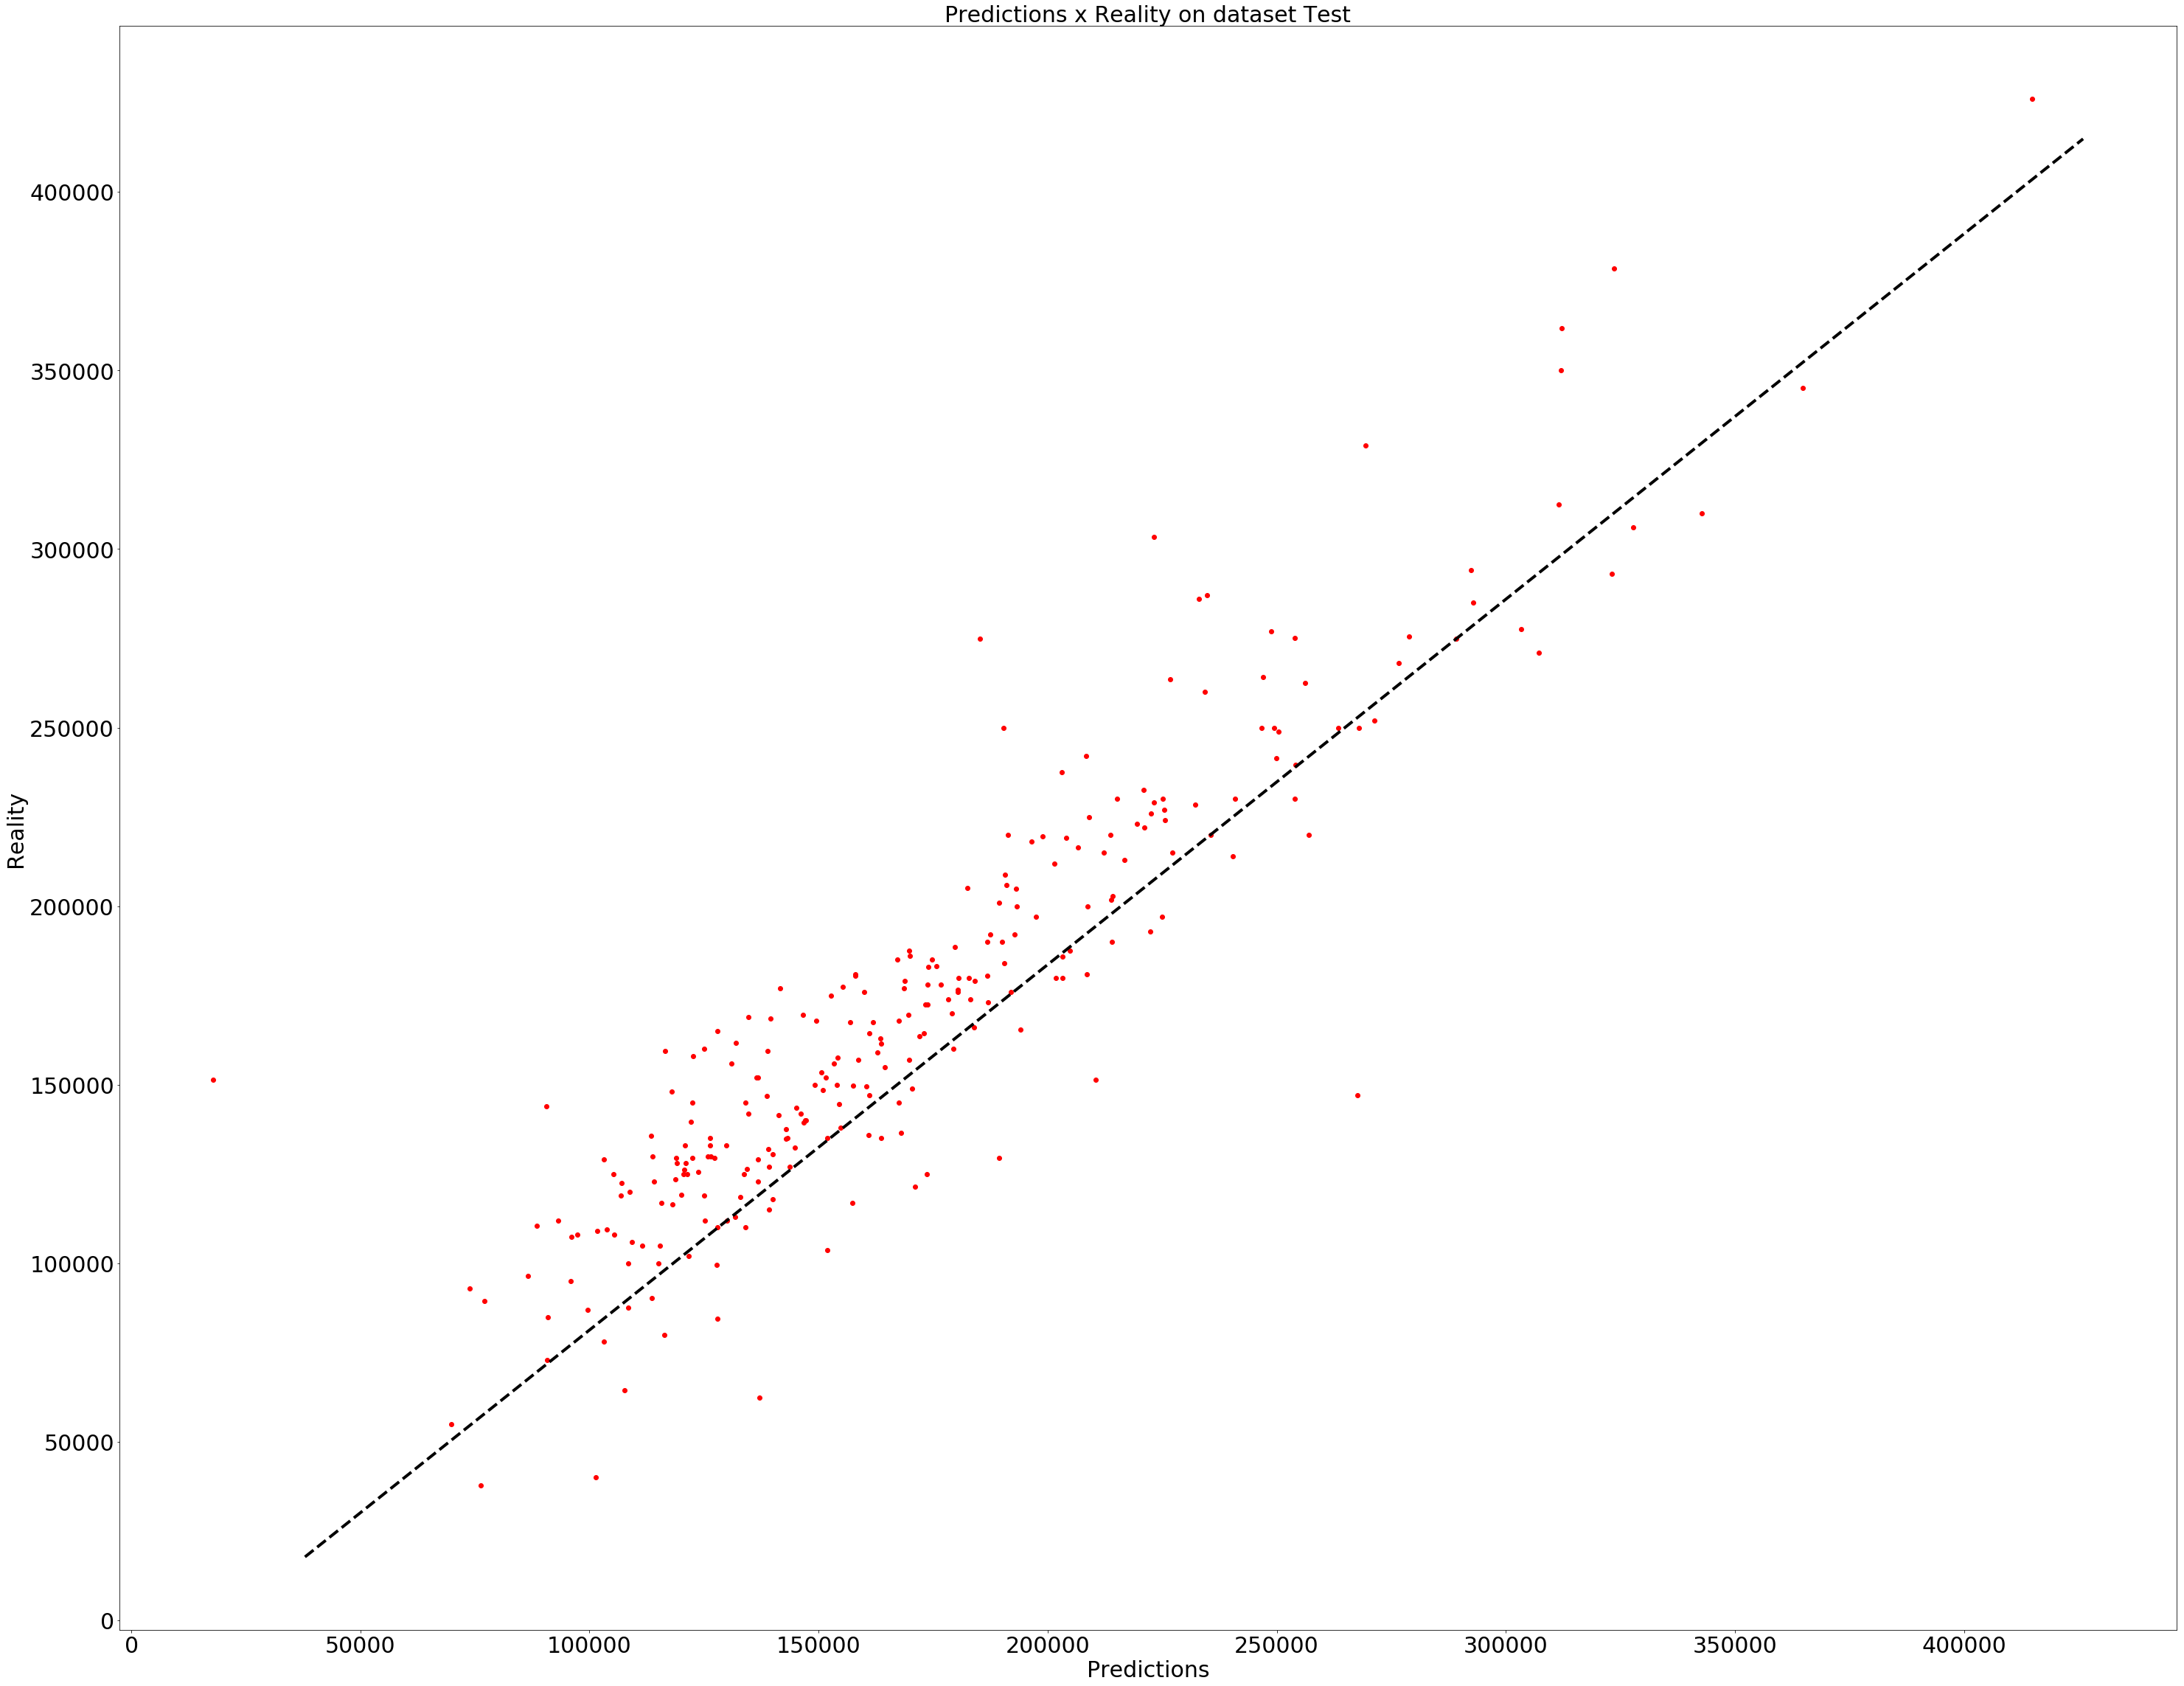

In [36]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(my_pred, test_y, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([test_y.min(), test_y.max()], [my_pred.min(), my_pred.max()], 'k--', lw=4)

plt.show()